# **Retail Cohort Analysis**

# Latar Belakang

Dalam industri retail, memahami perilaku pelanggan merupakan kunci untuk meningkatkan pengalaman berbelanja serta mempertahankan loyalitas pelanggan. Namun, tanpa pendekatan analitis yang tepat, bisnis sering kali kesulitan mengidentifikasi pola belanja pelanggan, faktor yang mempengaruhi retensi, serta strategi yang efektif untuk meningkatkan loyalitas pelanggan.

Cohort analysis merupakan teknik analisis perilaku dari sebuah kelompok orang tertentu yang menggunakan/membeli suatu produk atau jasa. Cohort analisis dapat membantu sebuah bisnis untuk memahami perilaku pelanggan, meningkatkan pengalaman pelanggan, dan membantu meningkatkan retensi pelanggan. Oleh karena itu, diperlukan cohort analysis untuk mengevaluasi perilaku pelanggan berdasarkan data transaksi yang tersedia. 

Pada project kali ini, akan dilakukan cohort analisis terhadap data transaksi dari sebuah toko retail. Analisis ini diharapkan menjadi bahan referensi bagi toko retail untuk memahami perilaku dari pelanggan dalam berbelanja, dapat memperoleh wawasan yang lebih dalam mengenai pola pembelian, dan meningkatkan retensi dan loyalitas dari pelanggan.

In [2]:
# Import library manipulasi data
import pandas as pd
import numpy as np
import datetime as dt

# Import library visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Data Understanding

In [3]:
# Load data online retail
df = pd.read_excel("Online Retail.xlsx", dtype={'CustomerID': str})
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [7]:
# Cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


# Data Cleaning

### Missing Value

In [8]:
# Cek missing value di dalam data
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Setelah dicek missing value nya, terlihat missing value ada pada kolom customer id dan description. Missing value pada kolom customer id sebanyak 135080 dan pada kolom description sebanyak 1454. 

Kemudian kita akan coba cek persentase jumlah missing value terhadap jumlah total data.

In [9]:
# Cek persentase missing value
(df.isna().sum()/len(df))* 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Setelah dicek persentase missing value nya, persentase pada description sebesar 0.27 persen, dan persentase pada customer id sebesar 25 persen. 

Pada kasus ini, persentase missing value pada customer id cukup besar. Namun data customer id pada analisis ini sangat penting, karena customer id merupakan nomor unik pelanggan yang akan dikelompokkan ke dalam grup tertentu. Tanpa data customer id, kita tidak dapat menentukan sebuah transaksi tergolong cohort group yang mana. 

Disatu sisi, sulit nya untuk melakukan adjustment terhadap data customer id menjadikan data dengan missing value tidak dapat digunakan. Dengan mempertimbangkan jumlah data yang cukup besar yaitu sebanyak 541909 data, maka data dengan missing value pada customer id akan dihapus.

In [10]:
# Handling missing value
df1 = df.dropna()
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


Setelah dilakukan penghapusan pada missing value, terlihat jumlah total data masih cukup besar, yaitu sebanyak 406829 data.

In [11]:
# Cek kembali missing value
df1.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# Cek kembali persentase missing value
(df1.isna().sum()/len(df))* 100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

Setelah dilakukan handling missing value, terlihat jumlah dan persentase missing value sudah 0. Saat ini dataset sudah bersih dari missing value.

### Duplicate

Selanjutnya kita akan melakukan pengecekan data duplikat.

In [13]:
# Cek duplikat di dalam data
df1.duplicated().sum()

5225

Setelah dicek data duplikatnya, terdapat 5225 data duplikat di dalam dataset. Data duplikat dapat membuat analisis menjadi bias, dikarenakan adanya perhitungan yang berulang, sehingga data menjadi tidak akurat. Maka dari itu, akan dilakukan penghapusan terhadap data duplikat.

In [14]:
# Handling duplikat 
df2 = df1.drop_duplicates()
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [15]:
# Cek duplikat di dalam data
df2.duplicated().sum()

0

Setelah dilakukan handling data duplikat, terlihat jumlah data duplikat sudah 0. Saat ini dataset sudah bersih dari missing value dan data duplikat dan siap digunakan untuk cohort analisis.

# Cohort Analysis

### Ringkasan Statistik dan Distribusi Data

In [ ]:
# Menampilkan ringkasan statistik data
display(df2.describe(), df2.describe(include="object"))

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:30,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283037,NaN,69.764035


,InvoiceNo,StockCode,Description,CustomerID,Country
count,401604,401604,401604,401604,401604
unique,22190,3684,3896,4372,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,United Kingdom
freq,542,2065,2058,7812,356728


In [ ]:
# Import library untuk melakukan normal test
from scipy.stats import normaltest

# Cek distribusi data pada kolom numerical
dist = []
numerical = ['Quantity', 'UnitPrice']
for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df2[feature_name])
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', 'P-value', 'Distributed'])
dist_df

,Feature,P-value,Distributed
0,Quantity,0.0,Not Normally Distributed
1,UnitPrice,0.0,Not Normally Distributed


### Konversi Tanggal

In [18]:
# Konversi tanggal ke periode bulan
df2['InvoicePeriod'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12


In [19]:
# Menampilkan periode paling awal dari pelanggan berbelanja sebagai transaksi pertama pada Cohort Group
df2['CohortGroup'] = df2.groupby('CustomerID')['InvoicePeriod'].transform('min')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,CohortGroup
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12


In [20]:
# Menampilkan jumlah pelanggan di masing-masing Cohort Group
cohort = df2.groupby(['CohortGroup', 'InvoicePeriod'], as_index=False)[['CustomerID']].agg(n_customer = ('CustomerID', 'nunique'))
cohort

,CohortGroup,InvoicePeriod,n_customer
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341
...,...,...,...
86,2011-10,2011-11,93
87,2011-10,2011-12,46
88,2011-11,2011-11,321
89,2011-11,2011-12,43


In [21]:
# Indexing invoice period terhadap transaksi pertama

from operator import attrgetter

cohort['PeriodDistance'] = (cohort['InvoicePeriod'] - cohort['CohortGroup']).apply(attrgetter('n'))
cohort

,CohortGroup,InvoicePeriod,n_customer,PeriodDistance
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [22]:
# Menampilkan jumlah pelanggan di setiap baris
cohort['CohortSize'] = cohort.groupby('CohortGroup')['n_customer'].transform('max')
cohort

,CohortGroup,InvoicePeriod,n_customer,PeriodDistance,CohortSize
0,2010-12,2010-12,948,0,948
1,2010-12,2011-01,362,1,948
2,2010-12,2011-02,317,2,948
3,2010-12,2011-03,367,3,948
4,2010-12,2011-04,341,4,948
...,...,...,...,...,...
86,2011-10,2011-11,93,1,352
87,2011-10,2011-12,46,2,352
88,2011-11,2011-11,321,0,321
89,2011-11,2011-12,43,1,321


In [23]:
# Menghitung persentase pelanggan yang melakukan transaksi berikutnya setelah transaksi pertama
cohort['Percentage'] = (cohort['n_customer']/cohort['CohortSize']) * 100
round(cohort, 2)

,CohortGroup,InvoicePeriod,n_customer,PeriodDistance,CohortSize,Percentage
0,2010-12,2010-12,948,0,948,100.00
1,2010-12,2011-01,362,1,948,38.19
2,2010-12,2011-02,317,2,948,33.44
3,2010-12,2011-03,367,3,948,38.71
4,2010-12,2011-04,341,4,948,35.97
...,...,...,...,...,...,...
86,2011-10,2011-11,93,1,352,26.42
87,2011-10,2011-12,46,2,352,13.07
88,2011-11,2011-11,321,0,321,100.00
89,2011-11,2011-12,43,1,321,13.40


In [24]:
# Menampilkan pivot table dari data
cohort_pivot = cohort.pivot_table(
    index = 'CohortGroup',
    columns = 'PeriodDistance',
    values =  'Percentage'
)
cohort_pivot

PeriodDistance,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortGroup,,,,,,,,,,,,,
2010-12,100.0,38.185654,33.438819,38.713080,35.970464,39.662447,37.974684,35.443038,35.443038,39.451477,37.341772,50.000000,27.42616
2011-01,100.0,23.990499,28.266033,24.228029,32.779097,29.928741,26.128266,25.653207,31.116390,34.679335,36.817102,14.964371,NaN
2011-02,100.0,24.736842,19.210526,27.894737,26.842105,24.736842,25.526316,28.157895,25.789474,31.315789,9.210526,NaN,NaN
2011-03,100.0,19.090909,25.454545,21.818182,23.181818,17.727273,26.363636,23.863636,28.863636,8.863636,NaN,NaN,NaN
2011-04,100.0,22.742475,22.073579,21.070234,20.735786,23.745819,23.076923,26.086957,8.361204,NaN,NaN,NaN,NaN
2011-05,100.0,23.655914,17.204301,17.204301,21.505376,24.372760,26.523297,10.394265,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.851064,18.723404,27.234043,24.680851,33.617021,10.212766,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.942408,20.418848,23.036649,27.225131,11.518325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.149701,25.149701,25.149701,13.772455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


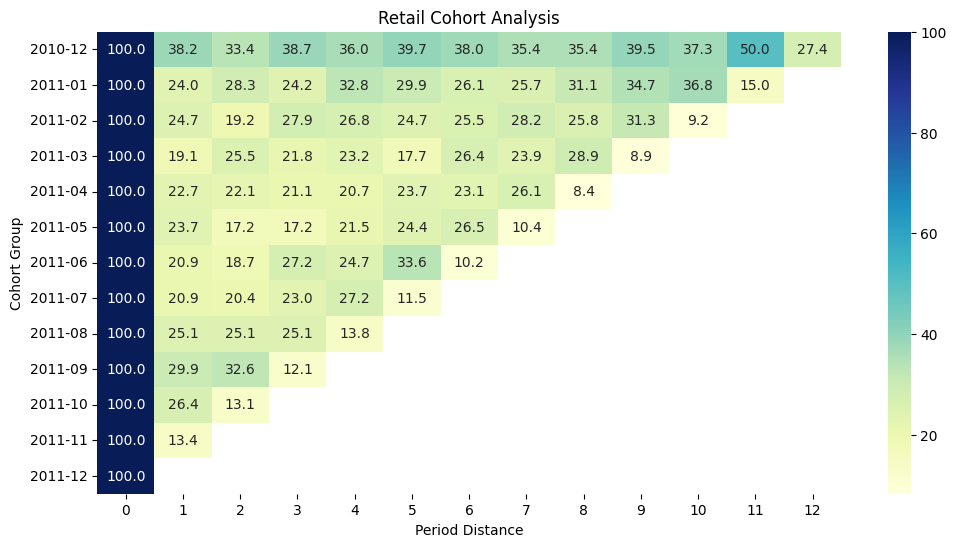

In [25]:
# Menampilkan visualisasi dari pivot table menggunakan heatmap

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.heatmap(
    cohort_pivot,
    annot = True,
    fmt = ".1f",
    cmap = "YlGnBu"
)

ax.set_xlabel('Period Distance')
ax.set_ylabel('Cohort Group')
ax.set_title('Retail Cohort Analysis')
plt.show()

Pada grafik heatmap di atas, terlihat bahwa cohort group Desember 2010 memiliki rata-rata retensi tertinggi, yaitu di atas 30 persen.

Hal ini menunjukkan bahwa pelanggan yang melakukan pembelian pertama pada bulan Desember cenderung lebih loyal dan melakukan pembelian ulang pada bulan-bulan berikutnya. Salah satu kemungkinan penyebabnya adalah peningkatan kualitas pelayanan menjelang akhir tahun, yang dapat menciptakan pengalaman positif dan kesan yang baik terhadap toko retail. Faktor musiman seperti promosi akhir tahun atau suasana belanja yang lebih intens juga bisa menjadi pemicu tingginya retensi pada cohort ini.

Pada bulan November 2011, tercatat tingkat pembelian ulang tertinggi di seluruh cohort group dan seluruh periode, dengan persentase mencapai 50 persen.

Artinya, setengah dari pelanggan yang pertama kali berbelanja pada cohort group Desember 2010 kembali melakukan pembelian pada bulan tersebut. Hal ini menunjukkan adanya kecenderungan pelanggan untuk mengulangi pengalaman positif yang mereka rasakan pada periode akhir tahun sebelumnya. Faktor seperti promosi musiman, kepuasan terhadap layanan sebelumnya, atau kebutuhan berulang menjelang akhir tahun kemungkinan turut berkontribusi terhadap tingginya tingkat retensi ini.

Setelah bulan Desember 2010, cohort group dengan rata-rata retensi tertinggi kedua adalah cohort group Januari 2011, dengan beberapa bulan mengalami retensi diatas 30 persen. Hal ini juga terjadi karena Januari 2011 masih dalam suasana akhir tahun, meskipun pembelian ulang pada bulan-bulan berikutnya lebih sedikit dibandingkan group Desember 2010.

# Kesimpulan dan Rekomendasi

## Kesimpulan

- Cohort Desember 2010 menunjukkan retensi tertinggi, dengan 50% pelanggan melakukan pembelian ulang. Ini kemungkinan dipengaruhi oleh promosi akhir tahun, kebutuhan musiman, atau pengalaman belanja yang positif.

- Cohort Januari 2011 juga memiliki performa retensi yang cukup baik, terutama di bulan-bulan awal setelah pembelian pertama.

- Tren retensi menurun seiring waktu pada semua kelompok pelanggan. Ini adalah pola umum, namun tetap perlu direspons dengan strategi khusus untuk mempertahankan pelanggan lebih lama.

- Cohort analysis membantu mengungkap waktu-waktu penting yang efektif untuk mendatangkan dan mempertahankan pelanggan, serta memberikan gambaran kapan pelanggan mulai kehilangan minat untuk kembali belanja.

## Rekomendasi

- Fokuskan promosi besar-besaran di akhir tahun, terutama bulan Desember, karena terbukti sangat efektif dalam mendorong pembelian dan retensi.

- Manfaatkan 3 bulan pertama setelah pembelian pertama dengan strategi follow-up seperti email reminder, penawaran khusus, atau voucher diskon untuk mendorong pembelian ulang.

- Segmentasikan pelanggan berdasarkan cohort agar strategi pemasaran bisa disesuaikan dengan karakter dan kebiasaan masing-masing kelompok.

- Replikasi elemen sukses dari Desember (seperti diskon, event, atau tema promosi) di bulan lain yang cenderung sepi, untuk melihat apakah efeknya bisa sama.

- Lakukan cohort analysis secara berkala agar strategi retensi selalu berbasis data terkini dan bisa cepat disesuaikan saat terjadi perubahan tren pelanggan.